In [1]:
# IMPORT LIBRARIES

import random as rn
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import pylab as pl
import sys
import pickle
from matplotlib.pyplot import cm

In [2]:
file_Name = 'sims.pkl'
fileObject = open(file_Name,'rb')  
# load the object from the file into var b
b = pickle.load(fileObject)  

In [3]:
b.keys()

dict_keys(['energy', 'nh', 'model', 'data', 'gamma', 'norm'])

In [4]:
#b['energy'],b['data'][100:110,:10]

In [5]:
N=b['data'].shape[0]

In [6]:
b['energy'].shape, b['model'].shape, b['model'].shape,  b['data'].shape,  b['gamma'].shape,  b['norm'].shape

((514,), (10000, 514), (10000, 514), (10000, 514), (10000,), (10000,))

In [7]:
#plt.hist(b['energy'])
#plt.hist(b['gamma'])

(array([1.400e+01, 6.400e+01, 7.450e+02, 7.036e+03, 1.834e+03, 2.260e+02,
        6.200e+01, 1.400e+01, 2.000e+00, 3.000e+00]),
 array([-2. , -0.9,  0.2,  1.3,  2.4,  3.5,  4.6,  5.7,  6.8,  7.9,  9. ]),
 <a list of 10 Patch objects>)

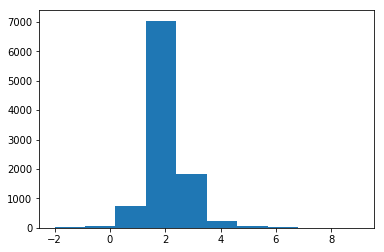

In [8]:
plt.hist(b['gamma'])

In [9]:
#plt.hist(b['norm'])
for i in range(8):
    print( i, int(i/2),(i%2))

0 0 0
1 0 1
2 1 0
3 1 1
4 2 0
5 2 1
6 3 0
7 3 1


In [71]:
residuals = (b['data'] - b['model'])#/np.sqrt(b['model'])#/68.49324956
residuals.shape
np.sum(residuals, axis=0).shape

(514,)

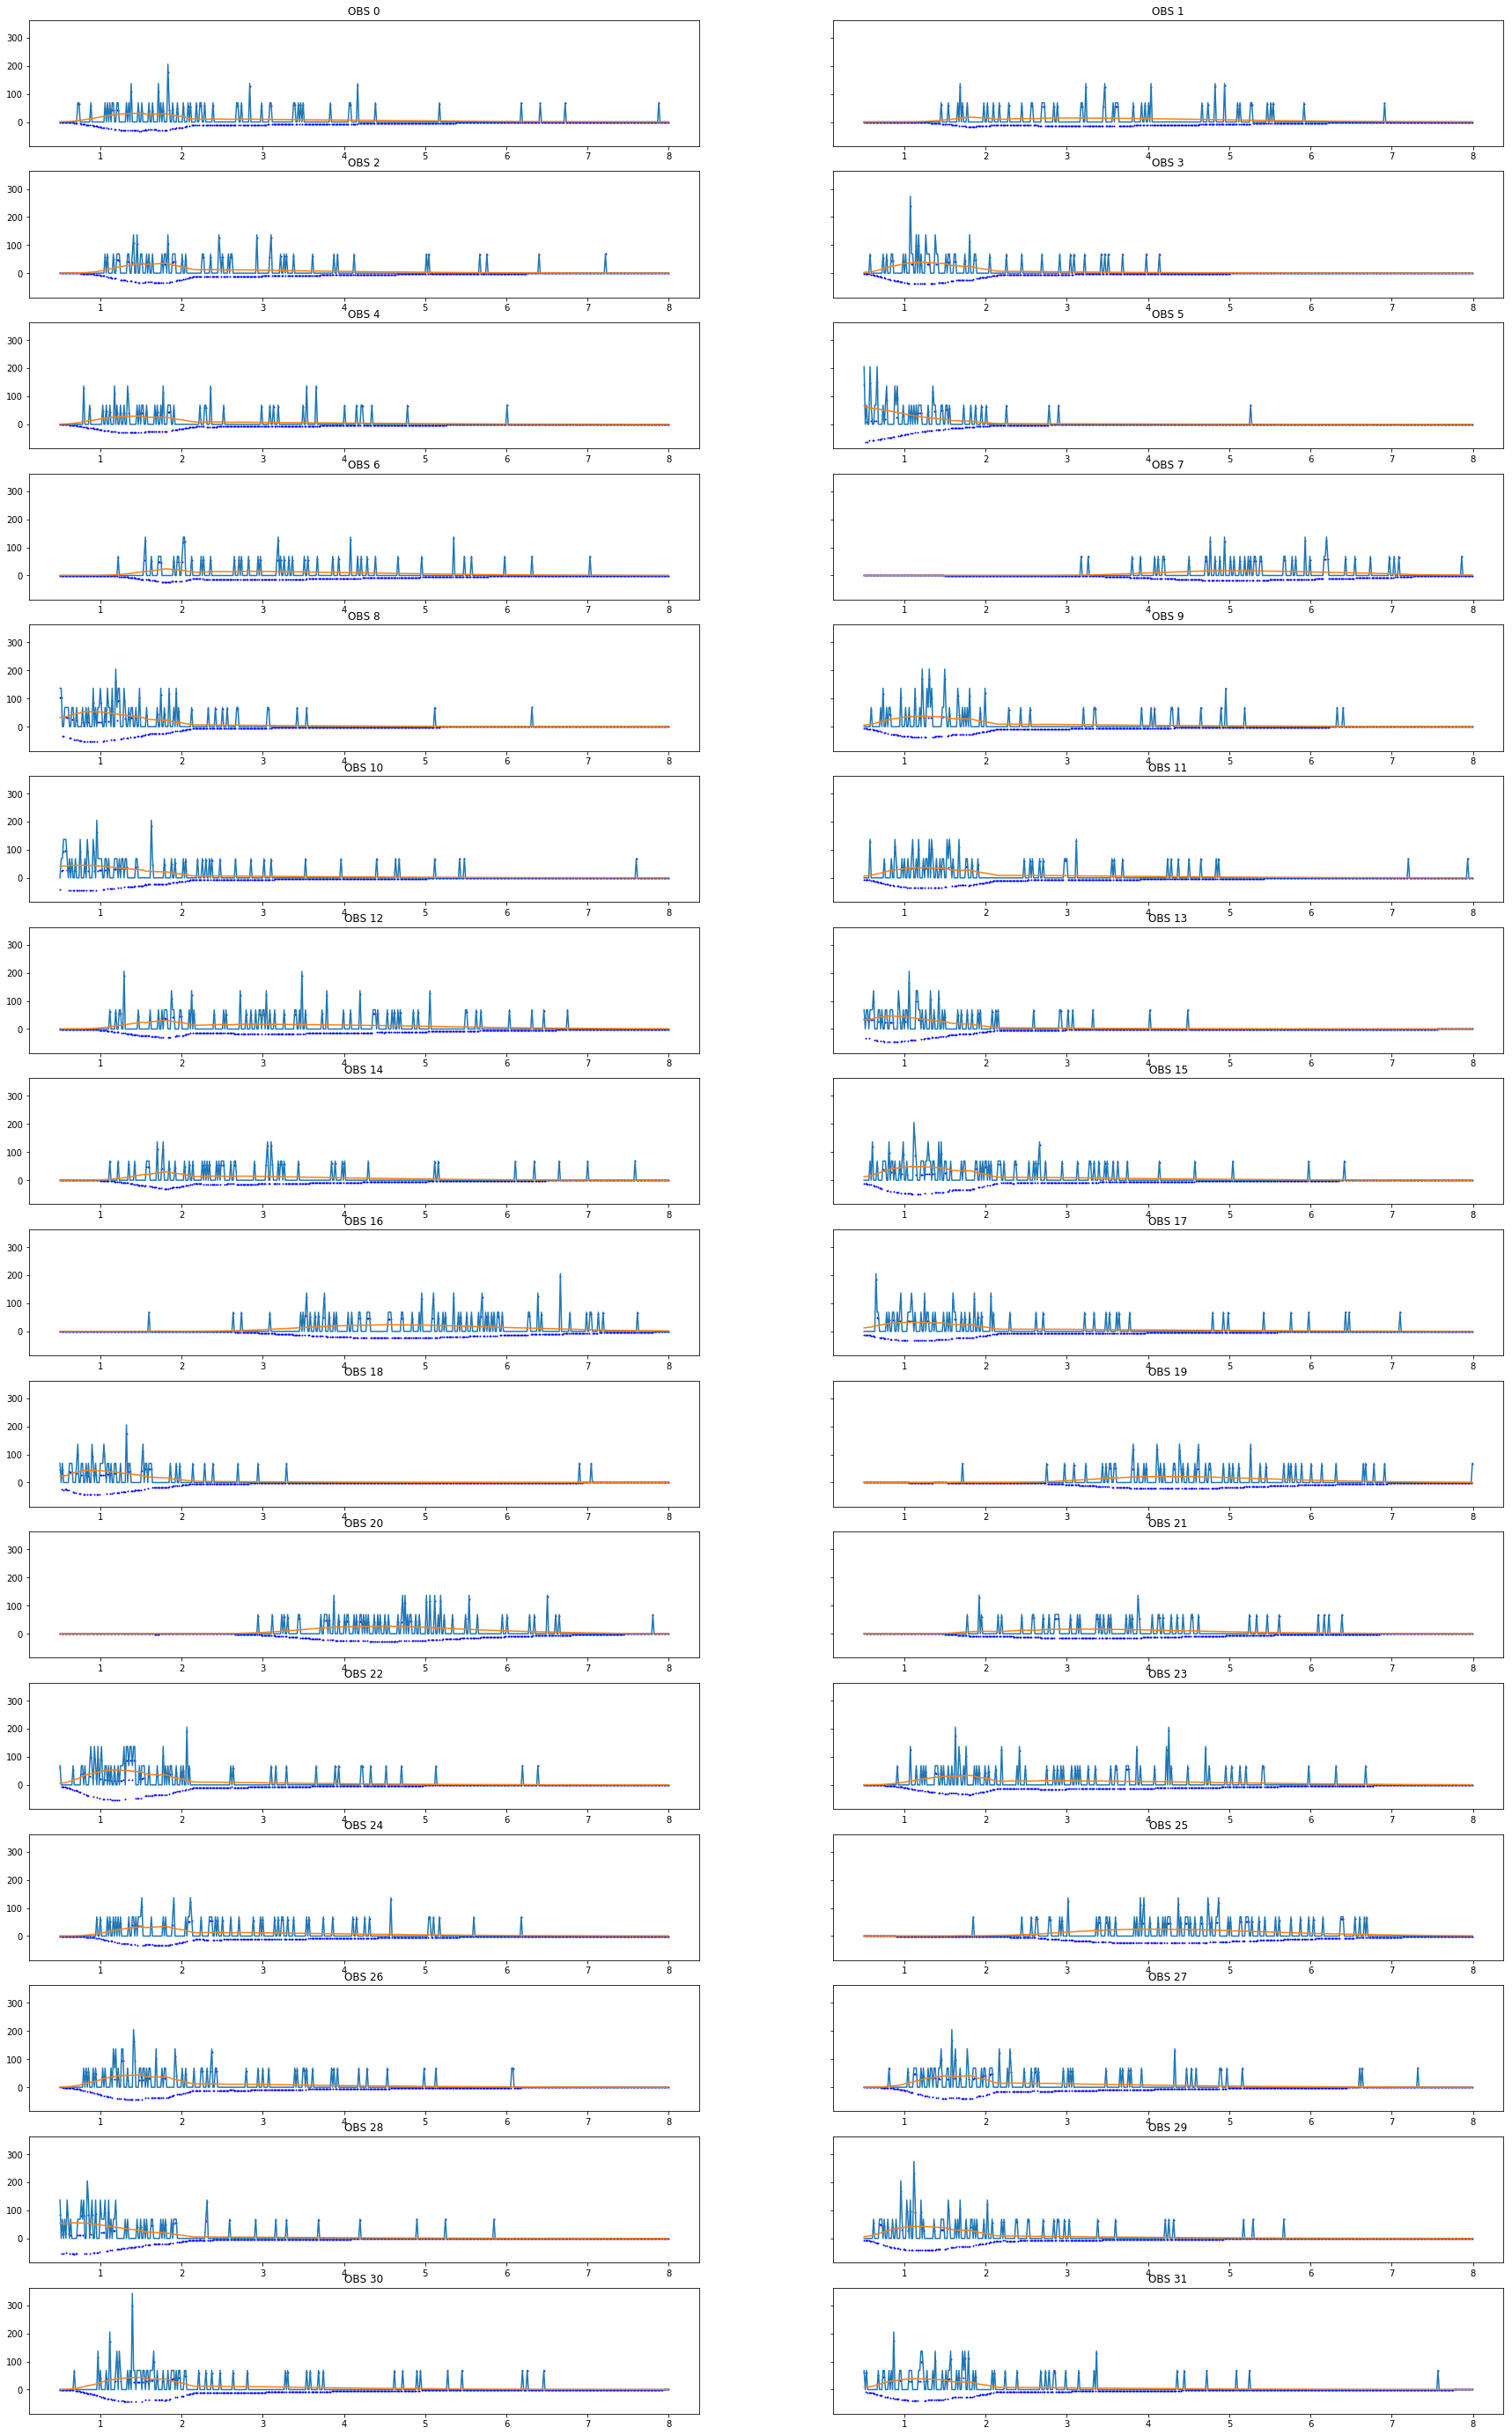

In [72]:
fig, ax = plt.subplots(16,2, sharey=True, figsize=(30,50))
for i in range(32):
    ax[int(i/2),(i%2)].plot(b['energy'], b['data'][i+1000,:])#/68.49324956)
    ax[int(i/2),(i%2)].plot(b['energy'], b['model'][i+1000,:])#/68.49324956)
    #ax[int(i/2),(i%2)].plot(b['energy'], c_model[i+1000,:], c='m')#/68.49324956)
    ax[int(i/2),(i%2)].scatter(b['energy'], residuals[i+1000,:],c='b', s=1)
    #ax[int(i/2),(i%2)].scatter(b['energy'], w_res[i,:],c='r', s=2)
    ax[int(i/2),(i%2)].set_title('OBS {}'.format(i))

In [73]:
alpha = np.sum(b['data'], axis=0)/np.sum(b['model'], axis=0)

In [74]:
#msk = b['data']!=0
w_res = (b['data'] - b['model']) *np.sqrt(b['data']+.001*68.49)/np.sum(np.sqrt(b['data']+.001*68.49), axis=0)
c = np.sum(w_res, axis=0)
c_model = b['model']*alpha
c_res = b['data']-c_model
print (np.sum(w_res))

23806.36051444881


In [75]:
alpha.shape
c_model.shape

(10000, 514)

In [76]:
np.sum(np.sqrt(b['data']), axis=0).shape
#np.sqrt(b['data']).shape
w_res2=1.*np.sum(w_res, axis=0)/max(np.sum(w_res, axis=0))

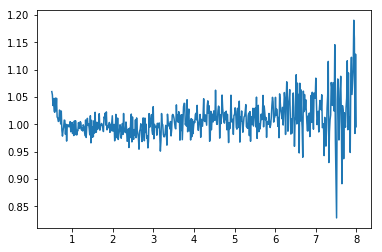

In [77]:
plt.plot(b['energy'], alpha)

In [78]:
alpha.shape

(514,)

In [79]:
# Move the window centered
# moving windows for times series scypy
w = 10
alpha_sm = np.ones(len(b['energy'])-w)
energy_sm = np.ones(len(b['energy'])-w)
for i in range(int(w/2),len(b['energy'])-int(w/2)):
    alpha_sm[i-int(w/2)]=np.mean(alpha[i-int(w/2):i+int(w/2)])
    energy_sm[i-int(w/2)]= b['energy'][i]

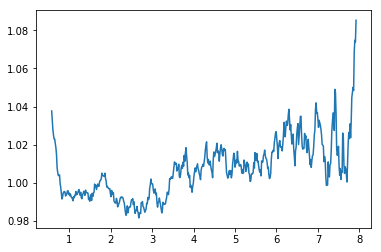

In [80]:
plt.plot( energy_sm,alpha_sm)
plt.savefig('alpha')

Include Poisson non diag elements of the alpha function

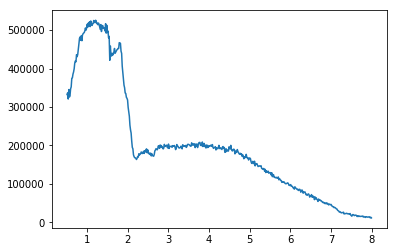

In [81]:
plt.plot(b['energy'], np.sum(b['data'], axis=0))

In [82]:
#plt.plot(b['energy'], np.sum(residuals, axis=0)/N)#/np.sum(np.sqrt(b['data'])))

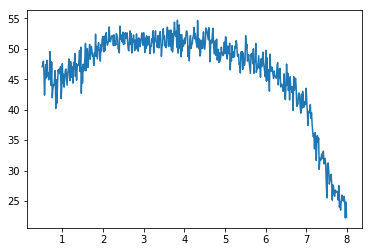

In [83]:
plt.plot(b['energy'],np.sum(w_res, axis=0))

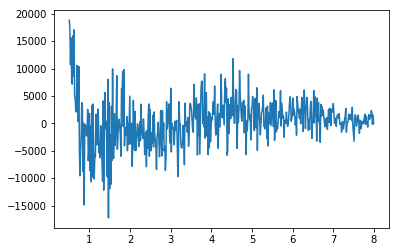

In [84]:
plt.plot(b['energy'],np.sum(residuals, axis=0))

plt.plot(b['energy'], np.sum(c_res, axis=0)/N)

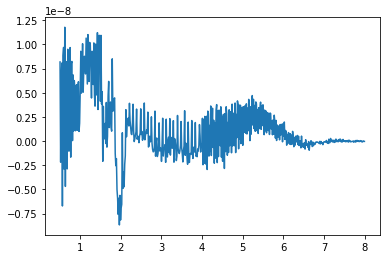

In [85]:
plt.plot(b['energy'],np.sum(c_res, axis=0))

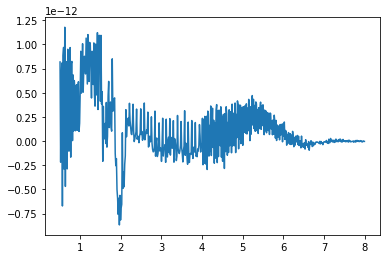

In [86]:
plt.plot(b['energy'],np.sum(c_res, axis=0)/N)

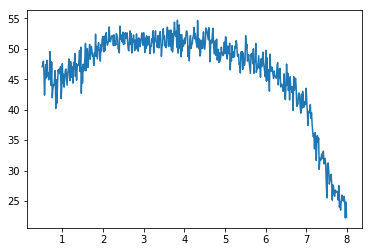

In [87]:
plt.plot(b['energy'],np.sum(w_res, axis=0))#/np.sum(np.sqrt(b['data'])))

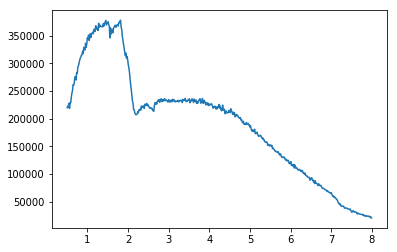

In [88]:
plt.plot(b['energy'],np.sum(abs(residuals), axis=0))

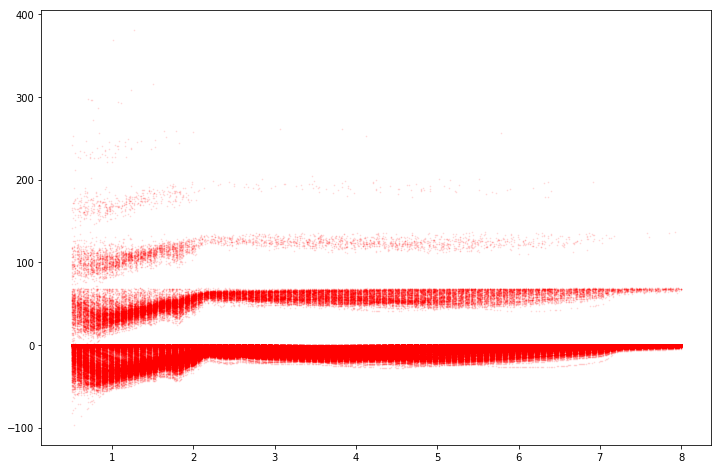

In [89]:
plt.figure(figsize=(12,8))
for i in range(0,1000):
    #plt.plot(b['energy'],residuals[i,:], 'o', alpha=0.1, ms=0.8, color='r');
    #plt.plot(b['energy'],c_res[i,:], 'o', alpha=0.1, ms=0.8, color='k');
    plt.plot(b['energy'],residuals[i,:], 'o', alpha=0.1, ms=0.8, color='r');
#residuals.T.shape

In [90]:
residuals[2, :].shape

(514,)

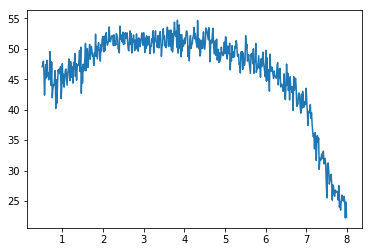

In [91]:
plt.plot(b['energy'],np.sum(w_res, axis=0))

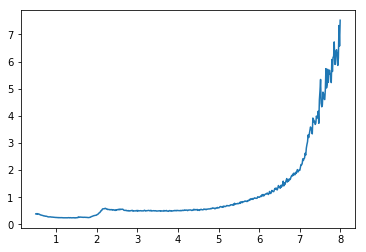

In [92]:
plt.plot(b['energy'],N/np.sum(np.sqrt(b['data']), axis=0))

Bayesian higherarchical model

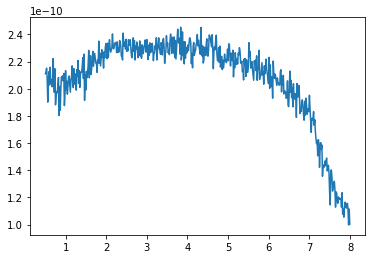

In [36]:
c = (np.sum(w_res, axis=0)/np.sum(np.sqrt(b['data'])))/(np.sum(np.sum(w_res, axis=0)))
#plt.plot(b['energy'],np.sum(w_res, axis=0)/np.sum(np.sqrt(b['data']), axis=0))
plt.plot(b['energy'],c)

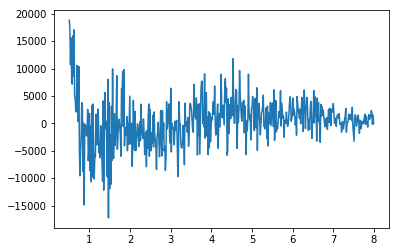

In [37]:
plt.plot(b['energy'], np.sum(residuals, axis=0))

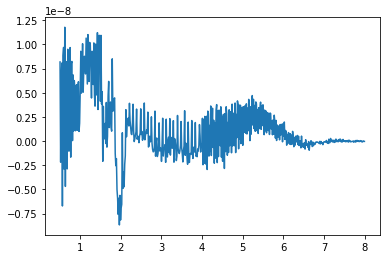

In [38]:
#c_model = b['model']*c/(np.sum(c))
#c_res = b['data']-c_model
#plt.plot(b['energy'], np.sum(residuals, axis=0))
plt.plot(b['energy'], np.sum(c_res, axis=0))

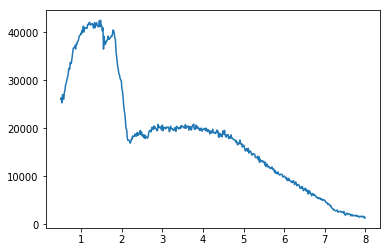

In [39]:
plt.plot(b['energy'], np.sum(np.sqrt(b['data']), axis=0))

NameError: name 'msk' is not defined

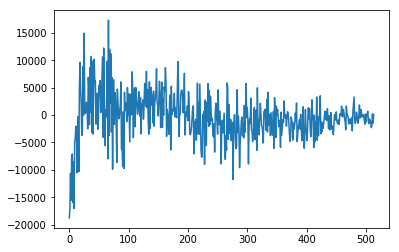

In [40]:
#plt.plot(sum(w_res))
#plt.plot(sum(residuals))
plt.plot(sum(w_res-residuals))
msk2=(w_res-residuals)!=0
print(w_res[msk])

In [ ]:
norm_model = np.array(c_model, dtype=float)
norm_data = np.array(b['data'], dtype=int)

In [ ]:
from scipy.special import factorial 
# Poisson probability of photon count given model
PoissonProb = np.exp(-norm_model) * norm_model**(norm_data)/(factorial(norm_data))
PoissonProb.shape

In [ ]:
fig, ax = plt.subplots(16,2, sharey=True, figsize=(30,50))
for i in range(32):
    #ax[int(i/2),(i%2)].plot(b['energy'], norm_data[i,:], c='b')
    ax[int(i/2),(i%2)].plot(b['energy'], c_model[i,:], c='r')
    ax[int(i/2),(i%2)].plot(b['energy'], norm_model[i,:], c='m')
    ax[int(i/2),(i%2)].plot(b['energy'], PoissonProb[i,:], c='g')

In [ ]:
mean = np.mean(PoissonProb, axis=0)
std = np.std(PoissonProb, axis=0)
mean.shape

In [41]:
plt.plot(b['energy'], mean)# sum(PoissonProb)/10000.)
plt.fill_between(b['energy'], mean-std/2,mean+std/2, alpha=0.5)# predictions["x2"],
#plt.scatter(b['energy'], mean+std/2, s=0.1, c='orange')# sum(PoissonProb)/10000.)
#plt.scatter(b['energy'], mean-std/2)

NameError: name 'mean' is not defined

In [160]:
#plt.errorbar(b['energy'], mean, yerr = std/2)

In [175]:
from scipy.special import factorial 
# Poisson probability of photon count given model
c=np.ones(PoissonProb.shape)
PoissonProb_star = np.exp(-norm_model*c) * (norm_model*c)**(norm_data)/(factorial(norm_data))
PoissonProb_star.shape

(10000, 514)

(10000, 514)


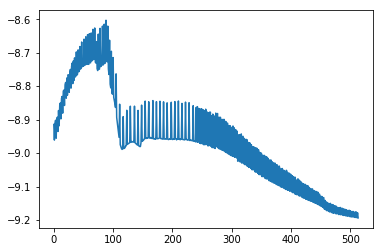

In [177]:
print(PoissonProb.shape)
np.log(np.sum(PoissonProb, axis=0))
plt.plot(-np.log(np.sum(PoissonProb, axis=0)))

In [181]:
Poisson_star = np.zeros(PoissonProb.shape)
for i in range(10000):
    Poisson_star += np.exp(-(c-1)*norm_model[i,:])*c**norm_data[i,:]*PoissonProb[i,:]

Poisson standard deviation is approx sqrt(count)

In [61]:
std = (b['model']-b['data'])/np.sqrt(b['model'])
std.shape

(10000, 514)

In [226]:
std_total = np.sum(std, axis=0)/N
std_total.shape

(514,)

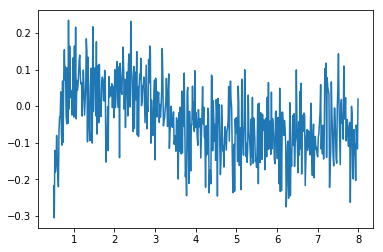

In [227]:
plt.plot(b['energy'],np.sum(std, axis=0)/N)

In [228]:
#for i in range(int(smth_std.shape[0])):
    #print (i, i*bin-bin/2+bin%2, )
bin=30
i=10
#print(i*bin+int((bin-bin%2)/2))
print(int((bin+1)/2)-1)
print(int((bin+1+(bin+1)%2)/2-1))
#sorted = np.sort(std_total[int(i*bin):int(i*bin+bin)])
#print(sorted[int((bin-bin%2)/2)], sorted)
print(int(smth_std.shape[0]))
print(int(smth_std.shape[0])-int(bin/2+bin%2))
print(int(bin/2+bin%2))
print(499+int(bin/2+bin%2))

14
15
514
499
15
514


In [241]:
bin = 50
smth_std = np.copy(std_total)
for i in range(int(smth_std.shape[0])):
    sorted = np.sort(std_total[max(0, i-int(bin/2)):min(smth_std.shape[0], i+int(bin/2))])
    ss = sorted.shape[0]
    #print(sorted)
    #print((sorted[int(ss/2)]))
    #print(sorted[int((ss+1)/2)])
    #smth_std[i] = (sorted[int(ss/2)]+sorted[int(int((ss+1)/2))])/2
    smth_std[i] = np.sum(sorted)/ss    
        
        

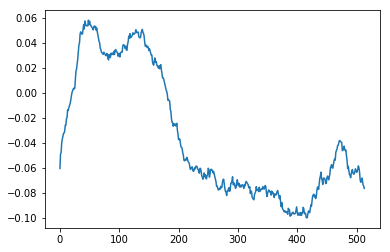

In [244]:
plt.plot(smth_std)

In [118]:
#np.sum(b['data'], axis=0)
model_c = b['model']

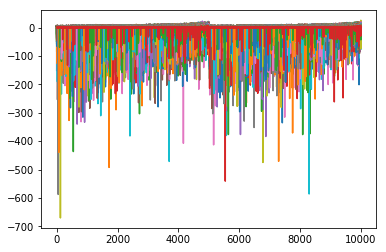

In [53]:
plt.plot(std[:,:])

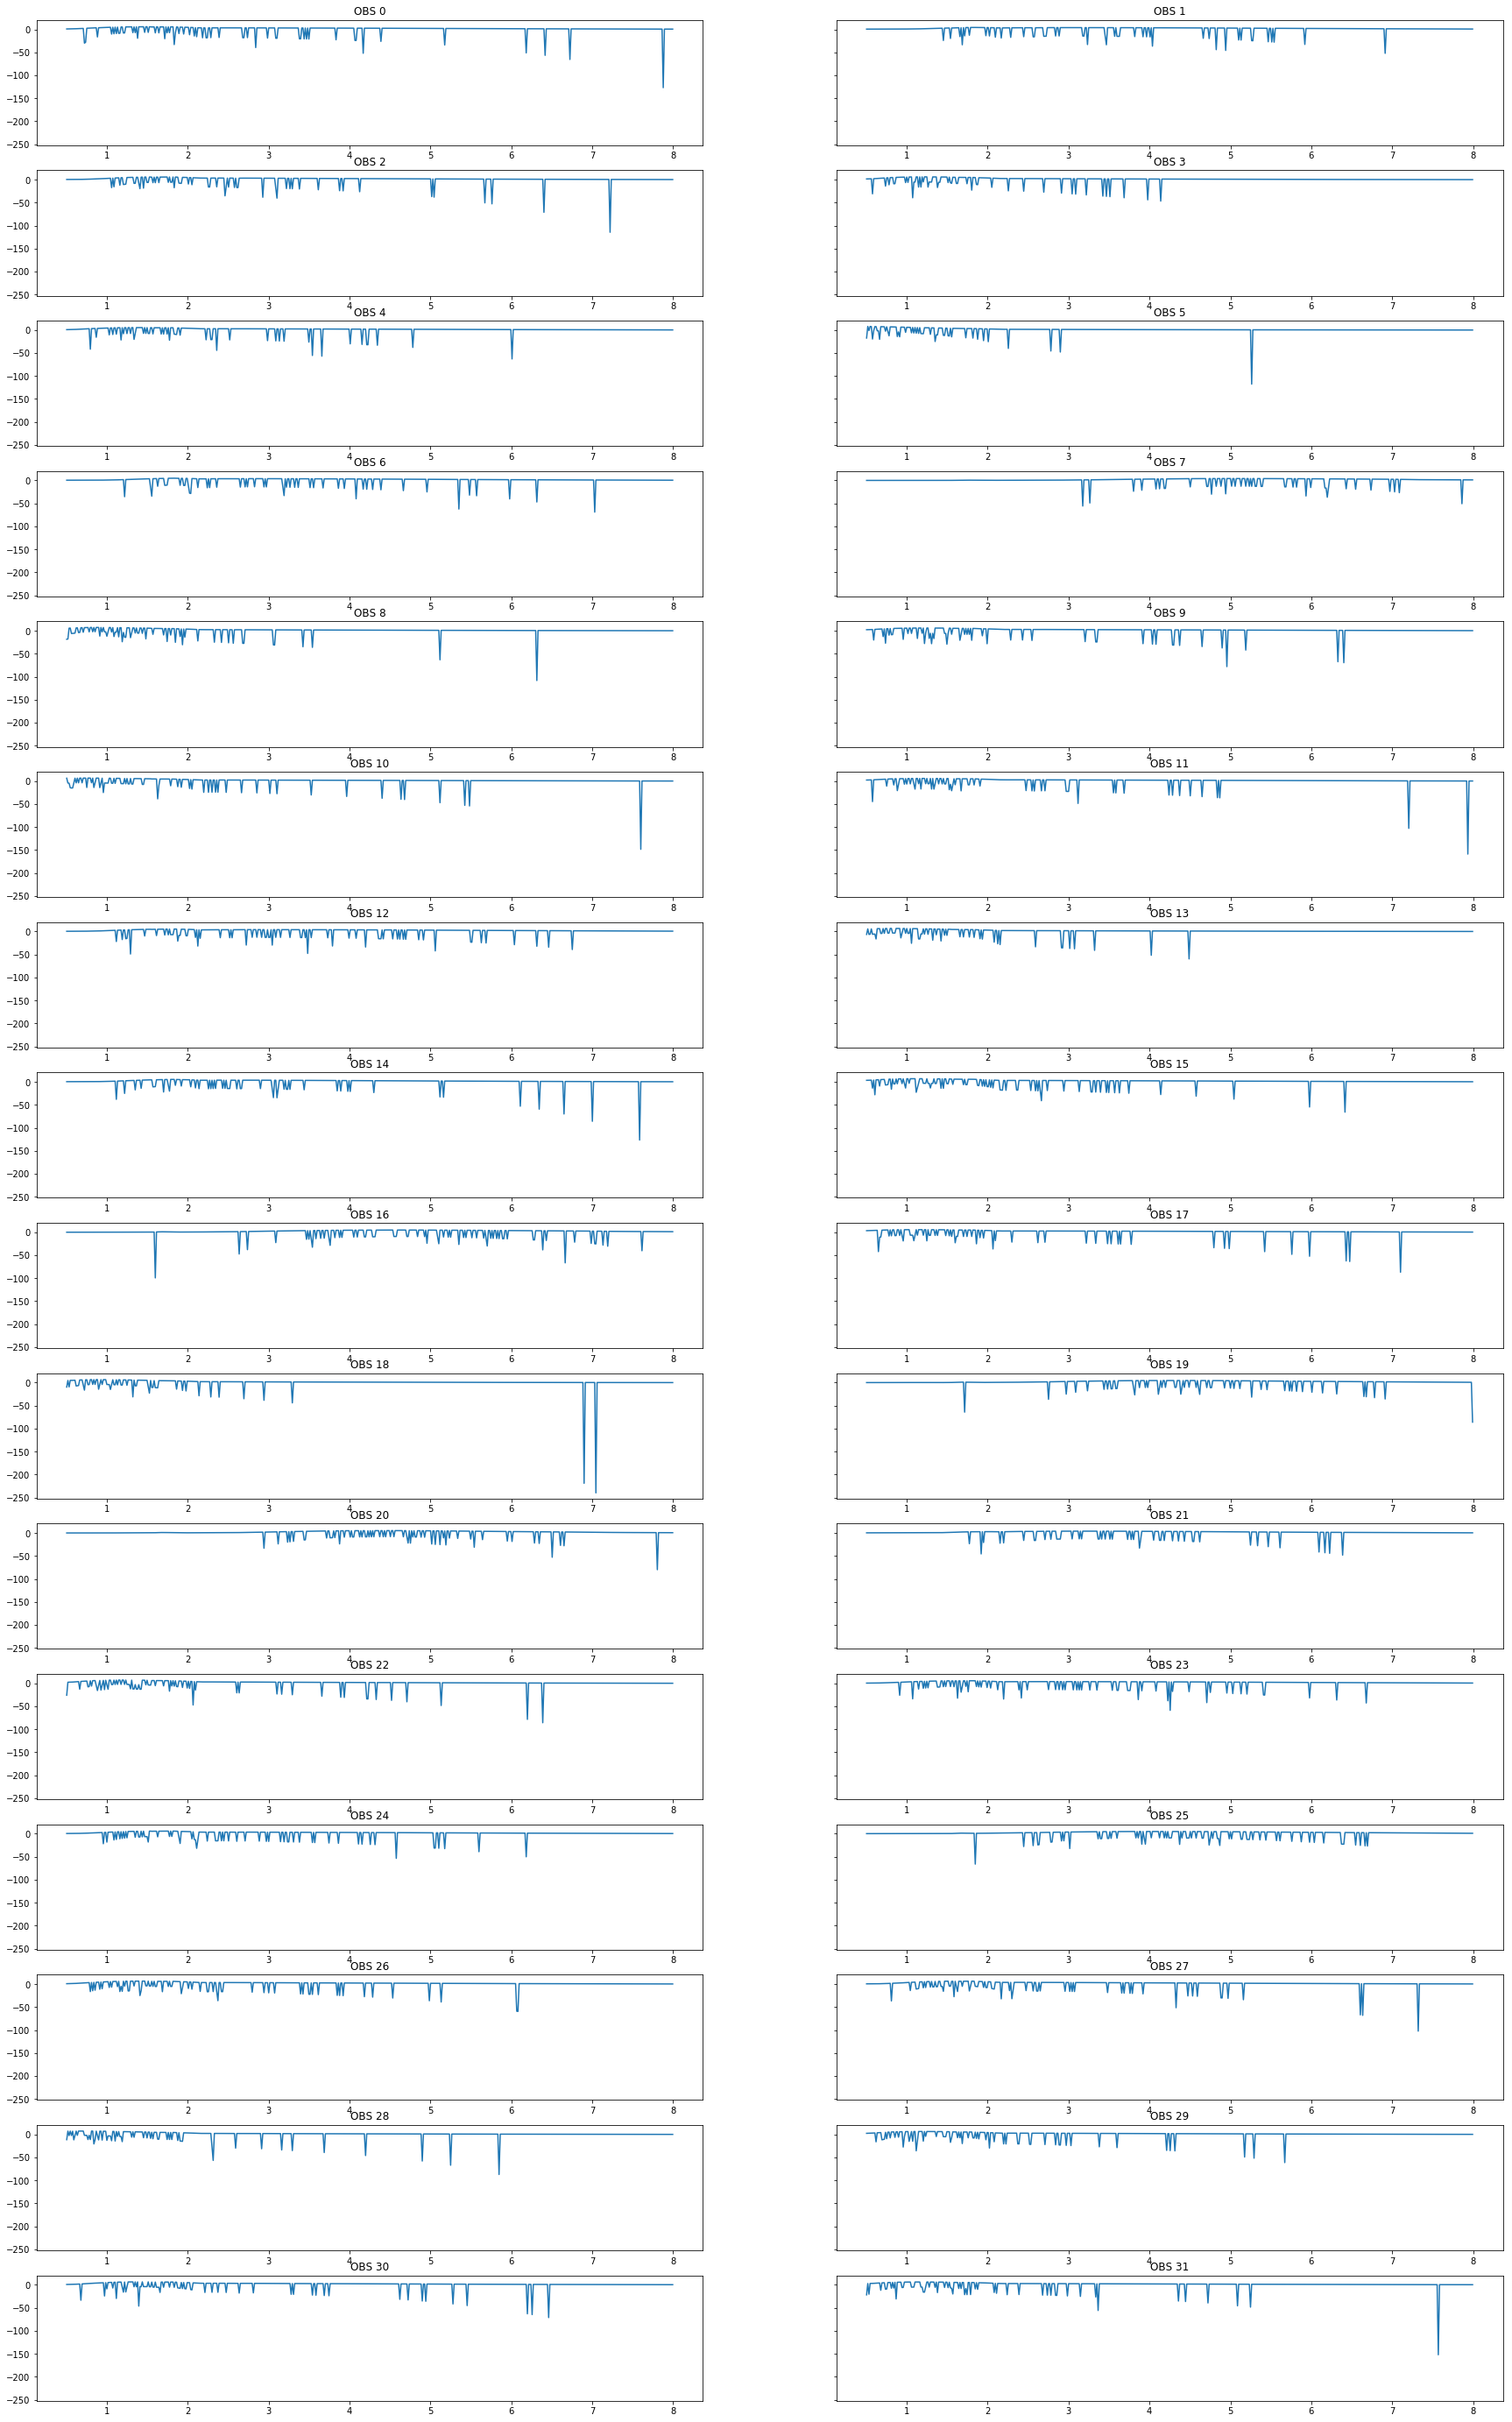

In [52]:
fig, ax = plt.subplots(16,2, sharey=True, figsize=(30,50))
for i in range(32):
    ax[int(i/2),(i%2)].plot(b['energy'], std[i+1000,:])#/68.49324956)
    #ax[int(i/2),(i%2)].plot(b['energy'], b['model'][i+1000,:])#/68.49324956)
    #ax[int(i/2),(i%2)].plot(b['energy'], c_model[i+1000,:], c='m')#/68.49324956)
    #ax[int(i/2),(i%2)].scatter(b['energy'], residuals[i+1000,:],c='b', s=1)
    #ax[int(i/2),(i%2)].scatter(b['energy'], w_res[i,:],c='r', s=2)
    ax[int(i/2),(i%2)].set_title('OBS {}'.format(i))

In [ ]:
PoissonProb = np.exp(-np.zeros) * norm_model**(std)/(factorial(std))

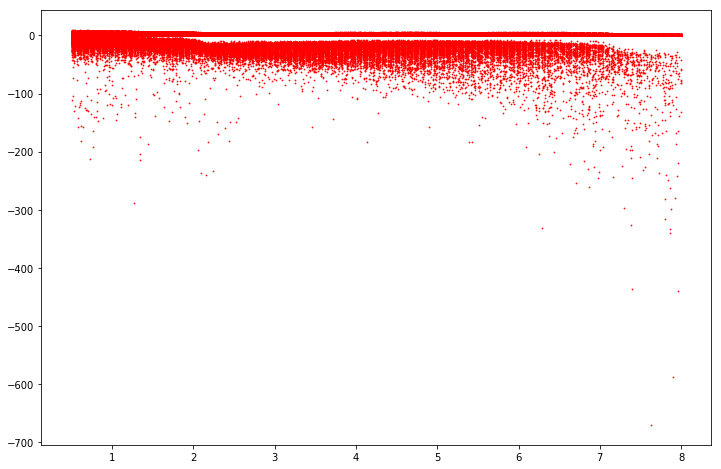

In [68]:
plt.figure(figsize=(12,8))
for i in range(0,1000):
    #plt.plot(b['energy'],residuals[i,:], 'o', alpha=0.1, ms=0.8, color='r');
    #plt.plot(b['energy'],c_res[i,:], 'o', alpha=0.1, ms=0.8, color='k');
    plt.plot(b['energy'],std[i,:], 'o', alpha=0.9, ms=0.8, color='r');
#residuals.T.shape